# Beyond the Gaussian case: Extreme risk estimates

**Is it safe to use Normal Distribution for Stock Returns?**

"Distributions of daily and monthly stock returns are rather symmetric about their means, but the tails are fatter (i.e., there are more outliers) than would be expected with normal distributions. - Fama and French

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Risk-adjusted-returns" data-toc-modified-id="Risk-adjusted-returns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Risk adjusted returns</a></span><ul class="toc-item"><li><span><a href="#Volatility" data-toc-modified-id="Volatility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Volatility</a></span></li><li><span><a href="#Returns" data-toc-modified-id="Returns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Returns</a></span><ul class="toc-item"><li><span><a href="#Compounded-Returns" data-toc-modified-id="Compounded-Returns-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Compounded Returns</a></span></li><li><span><a href="#Annualizing-Returns" data-toc-modified-id="Annualizing-Returns-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Annualizing Returns</a></span></li></ul></li><li><span><a href="#Sharpe-ratio" data-toc-modified-id="Sharpe-ratio-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sharpe ratio</a></span></li></ul></li><li><span><a href="#Maximum-Drawdown" data-toc-modified-id="Maximum-Drawdown-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Maximum Drawdown</a></span></li><li><span><a href="#Deviations-from-Normality" data-toc-modified-id="Deviations-from-Normality-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deviations from Normality</a></span><ul class="toc-item"><li><span><a href="#Skewness" data-toc-modified-id="Skewness-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Skewness</a></span></li><li><span><a href="#Kurtosis" data-toc-modified-id="Kurtosis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Kurtosis</a></span></li><li><span><a href="#Running-the-Jarque-Bera-Test-for-Normality" data-toc-modified-id="Running-the-Jarque-Bera-Test-for-Normality-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Running the Jarque-Bera Test for Normality</a></span></li><li><span><a href="#Testing-CRSP-Small-Cap-and-Large-Cap-returns-for-Normality" data-toc-modified-id="Testing-CRSP-Small-Cap-and-Large-Cap-returns-for-Normality-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Testing CRSP Small Cap and Large Cap returns for Normality</a></span></li></ul></li><li><span><a href="#Downside-Risk-Measures" data-toc-modified-id="Downside-Risk-Measures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Downside Risk Measures</a></span><ul class="toc-item"><li><span><a href="#Semi-Deviation" data-toc-modified-id="Semi-Deviation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Semi-Deviation</a></span></li><li><span><a href="#VaR" data-toc-modified-id="VaR-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>VaR</a></span></li><li><span><a href="#CVaR" data-toc-modified-id="CVaR-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CVaR</a></span></li><li><span><a href="#Parametric-Gaussian-VaR" data-toc-modified-id="Parametric-Gaussian-VaR-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Parametric Gaussian VaR</a></span></li><li><span><a href="#Cornish-Fisher-Modification" data-toc-modified-id="Cornish-Fisher-Modification-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Cornish-Fisher Modification</a></span></li></ul></li></ul></div>

In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

## Risk adjusted returns

Read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, we only want to look at the largest cap and the smallest cap companies:

Fama-French Data Library can be accessed through [here.](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

In [33]:
def get_ffme_returns():
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
    rets = me_m[['Lo 10', 'Hi 10']]
    rets.columns = ['SmallCap', 'LargeCap']
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets

In [43]:
returns = get_ffme_returns()
display(returns.head(3))
display(returns.tail(3))

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067


,SmallCap,LargeCap
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253
2018-12,-0.1531,-0.0890


In [45]:
returns.info() 

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
SmallCap    1110 non-null float64
LargeCap    1110 non-null float64
dtypes: float64(2)
memory usage: 66.0 KB


In [49]:
returns.describe() 

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


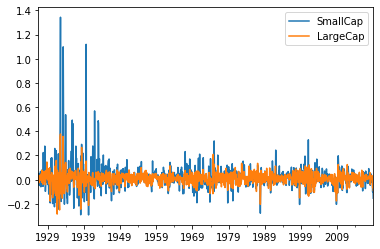

In [11]:
returns.plot()

### Volatility

Volatility is measured by the average squared deviation from the mean, which is the standard deviation.
We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12. Instead of using the `np.sqrt()` we can raise it to the power of $0.5$

In [21]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    """
    return r.std()*(periods_per_year**0.5)

In [24]:
ann_vol = annualize_vol(returns, 12)
ann_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

### Returns

#### Compounded Returns

We can produce compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

#### Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [23]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    Set of returns does not include NaN values.
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

In [25]:
ann_ret = annualize_rets(returns, 12)
ann_ret 

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

### Sharpe ratio

In [26]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [44]:
rf = 0.03
sharpe_ratio(returns, rf , 12)

SmallCap    0.363052
LargeCap    0.327176
dtype: float64

The Sharpe Ratio is telling us that once we adjust for the risk free rate, it looks like Small Caps actually gives a slightly better `risk-adjusted return` than Large Caps. 

## Maximum Drawdown

Volatility is not necessarily a bad thing, as it is a deviation from the mean, and a positive, upside devition is what we want.

Thus, it might be more insightful to use other measures of risk.

In this section, we'll develop the code to compute the **maximum drawdown** of a return series.

The maximum drawdown it is the theoretical loss you would have sustained if you had invested at the peak and sold at the trough.

---
To compute `DRAWDOWN` we need to make several steps:

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

In [50]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [52]:
drawdown(returns["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


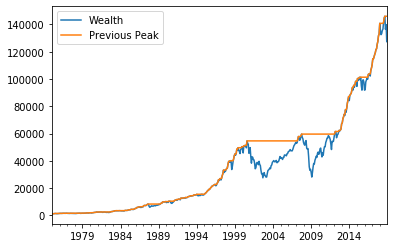

In [64]:
drawdown(returns['1975':]["LargeCap"])[['Wealth', 'Previous Peak']].plot()

Now let's see, was the damage between SmallCap and LargeCap the same in the next big crash?

In [58]:
dd75_small = drawdown(returns["SmallCap"]["1975":])["Drawdown"].min()
dd75_large = drawdown(returns["LargeCap"]["1975":])["Drawdown"].min()

print('The highest drawdown for Small Cap, since 1975 was:', round(dd75_small, 2))
print('The highest drawdown for Large Cap, since 1975 was:', round(dd75_large, 2))

The highest drawdown for Small Cap, since 1975 was: -0.63
The highest drawdown for Large Cap, since 1975 was: -0.53


Let us see at which period in our time series the highest drawdown occurred?

In [60]:
drawdown(returns["LargeCap"]["1975":])["Drawdown"].idxmin() 

Period('2009-02', 'M')

In [62]:
drawdown(returns["SmallCap"]["1975":])["Drawdown"].idxmin() 

Period('2009-02', 'M')

Not surprisingly, the biggest drawdown occurred during the `Financial crisis`. The Wealth index dropped by ~49%, from ~950 to ~500. 

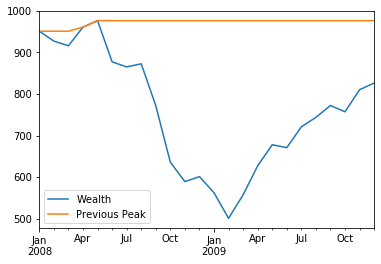

In [66]:
drawdown(returns['2008':'2009']["LargeCap"])[['Wealth', 'Previous Peak']].plot()

## Deviations from Normality

**Key points**
- Most asset returns are not normally distributed.
- Distribution can be described using **Skewness** and **Kurtosis** measures.
- Normality can be tested using `Jarque-Bera` test.
- Investors commonly use standard deviation to predict future returns, but standard deviation **assumes a normal distribution**.
- Assuming normal distribution can be costly, as deviations from normality can be severe.
- Thus, we require to introduce extreme risk measures, that would go beyond volatility and do a much better job at measuring extreme downside risk.

Today, we'll develop the code for skewness and kurtosis even though these are already available in the `scipy.stats` module, and then we'll apply them to hedge fund index returns.

We'll also look at using `scipy.stats` module to apply the `Jarque-Bera` test for normality, and apply them to different return series.

### Skewness

Intuitively, a negative skew means that you get more negative returns than you would have expected if the returns were distributed like the normal distribution.

Another way of thinking about it is if that returns are normally distributed, the mean and the median would be very close.

However, if they are negatively skewed, the expected value i.e. the mean is less than the median. If they are positively skewed, the expected value (again, the mean) is greater than the median.

![Image of Distributions](https://miro.medium.com/max/1200/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

Recall that the skewness is given by:

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$

In [73]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [101]:
# Generate a random normal variable, with a mean 0, and standard deviation 0.15
normal_rets = np.random.normal(0, 0.15, (263, 1))
normal_rets.mean(), normal_rets.std()

(-0.009005882351405162, 0.14457775051219207)

In [102]:
skewness(normal_rets) 

0.4324437202884236

### Kurtosis

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

Kurtosis is given by:

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

This is very similar to the skewness, so we can just copy and paste it and then edit it to compute the 4th rather than the 3rd power (as was the case for skewness).


In [ ]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [103]:
kurtosis(normal_rets) 

3.3864857796308403

### Running the Jarque-Bera Test for Normality

The `scipy.stats` module contains a function that runs the _Jarque-Bera_ test on a sequence of numbers. Let's apply that to the normally generated returns:

In [104]:
scipy.stats.jarque_bera(normal_rets)

(9.834025239021843, 0.007320968730660682)

The first number is the test statistic and the second number is the one we want. It represents the **p-value** for the hypothesis test. If we want to run the test at a 1% level of significance, we want this number to be **greater than 0.01 to accept the hypothesis that the data is normally distributed**, and if that number is less than 0.01 then you must reject the hypothesis of normality.

In this case, since we got a number higher than 0.01 we can accept the hypothesis that the numbers are normally distributed.

In [88]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

### Testing CRSP Small Cap and Large Cap returns for Normality

Let's see whether any of the returns we've been studying so far pass the normality hypothesis.

In [85]:
skewness(returns)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [86]:
kurtosis(returns)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [89]:
is_normal(returns) 

SmallCap    False
LargeCap    False
dtype: bool

## Downside Risk Measures


**Key Points**:

- The uncertainty on the downside is what investors are more concerned about. 
- Just merely looking at volatility doesn't do justice to this particular focus on downside risk. 
- Value at Risk (VaR) indicator is a pretty useful indicator that provides us with an estimate of the maximum loss at a given confidence level.

We're going to look at a few measures of downside risk. We've already seen how to compute `drawdowns`, but we're going to look at 3 popular measures, and we are going to develop code to compute these.

[Data for EDHEC Hedge Fund Historic Returns](https://risk.edhec.edu/all-downloads-hedge-funds-indices)

In [90]:
def get_hfi_returns():
    """
    Load and format the EDHEC Hedge Fund Index Returns
    """
    hfi = pd.read_csv("data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period('M')
    return hfi

In [92]:
hfi = get_hfi_returns()
display(hfi.head(3))
display(hfi.tail(3))

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022
2018-10,-0.0073,-0.0314,-0.0158,-0.0315,-0.0129,-0.0257,-0.0023,-0.0096,-0.0402,-0.0080,-0.0109,0.0237,-0.0269
2018-11,-0.0068,-0.0053,-0.0193,0.0120,-0.0211,-0.0034,-0.0067,-0.0087,-0.0044,0.0119,-0.0063,-0.0021,-0.0071


In [93]:
display(hfi.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 263 entries, 1997-01 to 2018-11
Freq: M
Data columns (total 13 columns):
Convertible Arbitrage     263 non-null float64
CTA Global                263 non-null float64
Distressed Securities     263 non-null float64
Emerging Markets          263 non-null float64
Equity Market Neutral     263 non-null float64
Event Driven              263 non-null float64
Fixed Income Arbitrage    263 non-null float64
Global Macro              263 non-null float64
Long/Short Equity         263 non-null float64
Merger Arbitrage          263 non-null float64
Relative Value            263 non-null float64
Short Selling             263 non-null float64
Funds Of Funds            263 non-null float64
dtypes: float64(13)
memory usage: 28.8 KB


None

In [94]:
display(hfi.describe())

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,0.005508,0.004074,0.006946,0.006253,0.004498,0.006344,0.004365,0.005403,0.006331,0.005356,0.005792,-0.001701,0.004262
std,0.016567,0.023335,0.017042,0.032538,0.008130,0.016744,0.011539,0.014722,0.019935,0.009619,0.011484,0.047746,0.015566
min,-0.123700,-0.056800,-0.083600,-0.192200,-0.058700,-0.088600,-0.086700,-0.031300,-0.067500,-0.054400,-0.069200,-0.134000,-0.061800
25%,-0.000150,-0.012050,-0.001450,-0.009750,0.001500,-0.001450,0.001650,-0.004050,-0.004750,0.000600,0.001000,-0.027100,-0.003500
50%,0.006500,0.001400,0.008900,0.009600,0.005100,0.008400,0.005500,0.003800,0.007900,0.006000,0.006700,-0.005300,0.005200
75%,0.013600,0.019850,0.017750,0.025700,0.008300,0.016200,0.009550,0.012400,0.019150,0.011100,0.012950,0.019850,0.012100
max,0.061100,0.069100,0.050400,0.123000,0.025300,0.044200,0.036500,0.073800,0.074500,0.027200,0.039200,0.246300,0.066600


### Semi-Deviation
The first measure is the simplest, which is the semideviation, which is nothing more than the volatility of the subset of returns that are negative.

The code is very simple:

In [95]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [96]:
semideviation(hfi).sort_values()

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

In [97]:
semideviation(returns)

SmallCap    0.051772
LargeCap    0.040245
dtype: float64

### VaR

Value at Risk (VaR) - represents the Maximum 'Expected' Loss over a given time period with a given probability.

We'll look at three different ways to compute Value At Risk. There is **no best model**, essentially it is a **trade-off between Sample Risk and Model Risk**, although `Cornish-Fisher` appears to be the best fit for most cases.

1. Historic VaR
    - Pros: No need to make assumptions about Asset Return Distribution
    - Cons: Sample Risk: Solely relies on historical data.
2. Parametric Gaussian VaR
    - Pros: Simple, only need to estimate mean and volatility of distribution.
    - Cons: Normal distribution is not common within Asset classes, thus estimating Gaussian VaR can lead to underestimating extreme risks.
3. Modified (Cornish-Fisher) VaR
    - Pros: Best of both worlds, no need to assume specific distribution. 

To compute the historic VaR at a certain level, say 5%, all we have to do is to find the number such that 5% of the returns fall below that number and 95% of the returns fall above that number. In other words, we want the 5 percentile return.

Fortunately, numpy has a `np.percentile` function that computes exactly that.

In [105]:
def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

Note that for reporting purposes, it is common to invert the sign so we report a positive number to represent the _loss_ i.e. the amount that is at risk.

In [107]:
var_historic(hfi, level=1).sort_values() 

Equity Market Neutral     0.018000
Global Macro              0.024316
Merger Arbitrage          0.025336
Relative Value            0.026660
Convertible Arbitrage     0.031776
Funds Of Funds            0.039664
Fixed Income Arbitrage    0.041672
Distressed Securities     0.046654
Event Driven              0.048612
CTA Global                0.049542
Long/Short Equity         0.049558
Emerging Markets          0.088466
Short Selling             0.113576
dtype: float64

**Interpretation**: Covertible Arbitrage VaR (at 1% level) is 0.031776.
What it means that there is a 1% chance that in any given month, you going to loose around 3.17% or worse.

### CVaR

**VaR** gives us a `range` of potential losses. **CVaR** is a conditional value at risk. It gives us an `average expected loss`. VaR is a less accurate and lower approximation of risk compared to CVaR. 

Now that we have the VaR, the CVaR is very easy. All we need is to find the mean of the numbers that fell below the VaR!

In [108]:
def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [109]:
cvar_historic(hfi, level = 1).sort_values() 

Global Macro              0.029333
Equity Market Neutral     0.036100
Merger Arbitrage          0.036233
Relative Value            0.052367
CTA Global                0.054767
Funds Of Funds            0.061133
Long/Short Equity         0.061867
Distressed Securities     0.070967
Event Driven              0.071267
Fixed Income Arbitrage    0.072467
Convertible Arbitrage     0.086100
Short Selling             0.123867
Emerging Markets          0.141167
dtype: float64

**Interpretation**: 

Covertible Arbitrage VaR (at 1% level) is 0.031776.
What it means that there is a 1% chance that in any given month, you going to loose around 3.17% or worse.

CVaR - Given 1% of the worst outcomes, the average of that is a 8.6% loss in a month.

### Parametric Gaussian VaR

The idea behind this is very simple. If a set of returns is normally distributed, we know, for instance, that 50% of the returns are below the mean and 50% are above.

![Normal distribution](https://cdn-images-1.medium.com/max/800/1*IdGgdrY_n_9_YfkaCh-dag.png)

We also know that approx two thirds of the returns lie within 1 standard deviation. That means one third lie beyond one standard deviation from the mean. Since the normal distribution is symmetric, approximately one sixth (approx 16%) lie below one standard deviation away from the mean. Therefore, if we know the mean and standard deviation and if we assume that the returns are normally distributed, the 16% VaR would be the mean minus one standard deviation.

In general we can always convert a percentile point to a **z-score (which is the number of standard deviations away from the mean that a number is)**. Therefore, if we can convert the VaR level (such as 1% or 5%) to a z-score, we can calculate the return level where that percent of returns lie below it.

`scipy.stat.norm` contains a function `ppf()` which does exactly that. It takes a percentile such as 0.05 or 0.01 and gives you the z-score corresponding to that in the normal distribution.

Therefore, all we need to do to estimate the VaR using this method is to find the z-score corresponding to percentile level, and then add that many standard deviations to the mean, to obtain the VaR.

In [111]:
from scipy.stats import norm
def var_gaussian(r, level=5):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))

**Note: if the returns are not normal - z-score will give us innacurate result!**

In [112]:
var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [113]:
is_normal(hfi)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

### Cornish-Fisher Modification

The Cornish-Fisher modification is an elegant and simple adjustment.

The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If the returns arent normal, we know that z-score will give us an inaccurate number. The basic idea is that since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to come up with a modifed z-score. e.g. intuitively, all other things being equal, if the skewness is negative, we'll decrease the z-score further down, and if the skewness is positive, we'll push it up.

The adjusted z-score which we'll call $z_{cornishfisher}$ given by:

$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$


We can modify the previous function by adding a "modified" parameter with a default value of `True` as follows. If `True` then the following piece of code is executed, which modifes `z`:

```python
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
```

The rewritten function is:

In [114]:
from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
        
    return -(r.mean() + z*r.std(ddof=0))

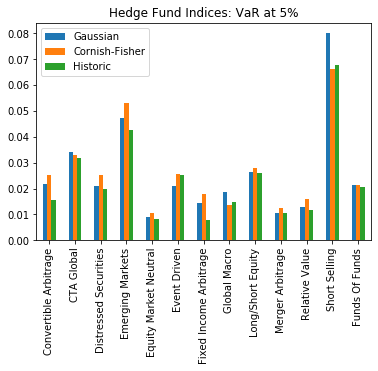

In [116]:
var_list = [var_gaussian(hfi), 
             var_gaussian(hfi, modified=True), 
             var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

Note that in some cases, the `Cornish-Fisher VaR` is lower i.e. estimates a smaller loss than you would get from a pure `Gaussian assumption`. That can happen if the observed skewness is positive, as is the case for "Short Selling" and "Global Macro"

In [117]:
skewness(hfi).sort_values(ascending=False)

Global Macro              0.982922
Short Selling             0.767975
CTA Global                0.173699
Funds Of Funds           -0.361783
Long/Short Equity        -0.390227
Emerging Markets         -1.167067
Distressed Securities    -1.300842
Merger Arbitrage         -1.320083
Event Driven             -1.409154
Relative Value           -1.815470
Equity Market Neutral    -2.124435
Convertible Arbitrage    -2.639592
Fixed Income Arbitrage   -3.940320
dtype: float64